## Импорты

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy
print (numpy.__version__)
print (numpy.__file__)

1.22.4
/usr/local/lib/python3.10/dist-packages/numpy/__init__.py


In [ ]:
!pip install numpy --upgrade --ignore-installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 27.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 78.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 84.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 6.6 MB/s eta 0:00:00
  Created wheel for auto-sklea

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shutil
from pprint import pprint
from time import time

In [ ]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 200
pd.options.display.width = 200

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/internship_fintech/dataset/processed_dataset.сsv')
print(df.shape)
# df.head()

(241683, 43)


## Auto-sklearn

In [ ]:
import autosklearn.classification
from sklearn.metrics import accuracy_score


X = df.drop('Класс', axis=1)
y = df['Класс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


t1 = time() 

cls_autosk = autosklearn.classification.AutoSklearnClassifier()

cls_autosk.fit(X_train, y_train)

print('Затраченное время:', time() - t1, 'cекунд')

3599.060679912567


In [ ]:
print(cls_autosk.leaderboard())

          rank  ensemble_weight               type      cost    duration
model_id                                                                
26           1             0.16  gradient_boosting  0.003150  185.970289
31           2             0.10  gradient_boosting  0.003276  273.551211
25           3             0.10  gradient_boosting  0.005642   53.903913
18           4             0.02  gradient_boosting  0.019309   99.614733
2            5             0.02      random_forest  0.034778  223.008786
21           6             0.02  gradient_boosting  0.075605   14.806059
15           7             0.58           adaboost  0.105697  142.848770


In [ ]:
pprint(cls_autosk.show_models(), indent=1)

{2: {'balancing': Balancing(random_state=1),
     'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2d19921fc0>,
     'cost': 0.0347778387273725,
     'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2d1f72ba00>,
     'ensemble_weight': 0.02,
     'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f2d19923ca0>,
     'model_id': 2,
     'rank': 1,
     'sklearn_classifier': RandomForestClassifier(max_features=6, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
 15: {'balancing': Balancing(random_state=1),
      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2d19369600>,
      'cost': 0.10569704568607474,
      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2d1f914760>,
      

In [ ]:
# Получение прогнозов для тестовой выборки
y_pred = cls_autosk.predict(X_test)

# Вычисление точности (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9960692637110288


**Результат Accuracy: 0.9960**

Модель:

{'balancing': Balancing(random_state=1, strategy='weighting'),
      'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f2d1aaf4040>,
      'cost': 0.0031502233367290966,
      'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f2d193f0160>,
      'ensemble_weight': 0.16,
      'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f2d1aecfee0>,
      'model_id': 26,
      'rank': 6,
      'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=False, l2_regularization=1e-10,
                               learning_rate=0.056233891852873925, max_iter=512,
                               max_leaf_nodes=227, min_samples_leaf=1,
                               n_iter_no_change=0, random_state=1,
                               validation_fraction=None, warm_start=True)}

**cm**

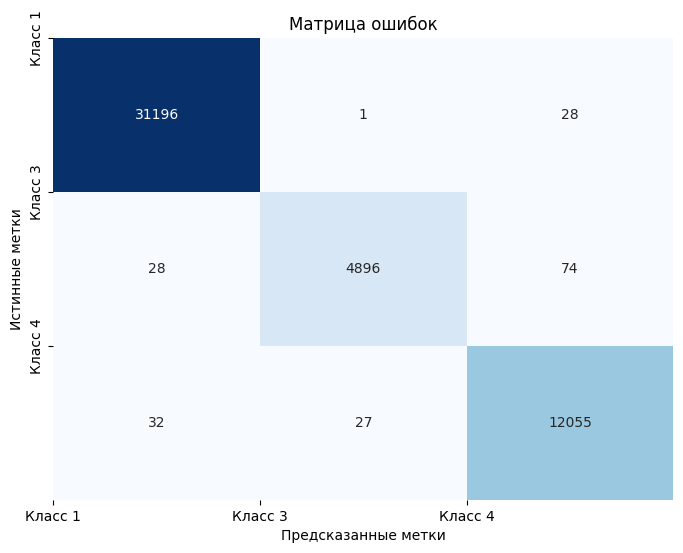

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.xticks(np.arange(3), ['Класс 1', 'Класс 3', 'Класс 4'])
plt.yticks(np.arange(3), ['Класс 1', 'Класс 3', 'Класс 4'])
plt.show()

# Топ 20 фичей отобранных ExtraTreesClassifier

[4.66085292e-02 4.12760336e-02 4.08840868e-02 4.29740101e-02
 1.61776564e-02 3.60278113e-02 4.29908137e-02 1.86597721e-01
 4.21268658e-02 2.52802806e-02 8.88604325e-03 5.29093001e-03
 1.03089429e-02 1.54093065e-02 9.23033335e-02 9.64852997e-03
 7.69337944e-03 2.83475817e-03 1.84819816e-03 1.27604272e-01
 2.31442718e-03 3.75454759e-02 2.92234708e-02 3.81581254e-03
 1.98544194e-03 7.88592988e-04 1.67791788e-03 8.57000759e-04
 7.57049765e-04 3.81539047e-03 8.22662022e-05 8.87004148e-05
 7.77320582e-05 1.05132066e-02 1.87925748e-03 2.33053665e-02
 3.61633065e-02 3.31733930e-02 3.17197096e-03 9.36622902e-04
 2.08438045e-03 2.97171448e-03]


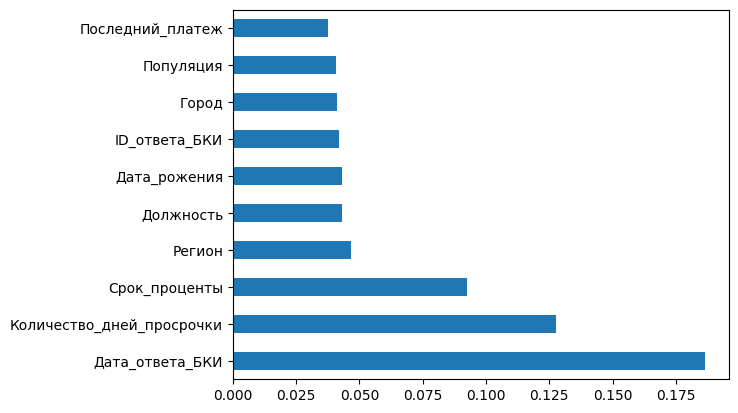

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

# X = df.drop('Класс', axis=1)
# y = df['Класс']

# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

In [ ]:
# import autosklearn.classification
# from sklearn.metrics import accuracy_score

# X = df.drop('Класс', axis=1)
# X = X[feat_importances.nlargest(20).to_dict().keys()]
# y = df['Класс']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# t1 = time() 
# cls_autosk2 = autosklearn.classification.AutoSklearnClassifier()

# cls_autosk2.fit(X_train, y_train)
# print('Затраченное время:', time() - t1, 'cекунд')

In [ ]:
# print(cls_autosk2.leaderboard())

In [ ]:
# pprint(cls_autosk2.show_models(), indent=1)

In [ ]:
# # Получение прогнозов для тестовой выборки
# y_pred = cls_autosk2.predict(X_test)

# # Вычисление точности (accuracy)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

**cm**

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel('Предсказанные метки')
# plt.ylabel('Истинные метки')
# plt.title('Матрица ошибок')
# plt.xticks(np.arange(3), ['Класс 1', 'Класс 3', 'Класс 4'])
# plt.yticks(np.arange(3), ['Класс 1', 'Класс 3', 'Класс 4'])
# plt.show() 